# **Farmer Optimization Algorithm using SciPy**

Problem Statement:
A farmer has a choice of planting barley, oats, rice, or wheat on each acre of their 200-acre farm. The labor, water, and fertilizer requirements, yields per acre, and selling prices are given in the following table:

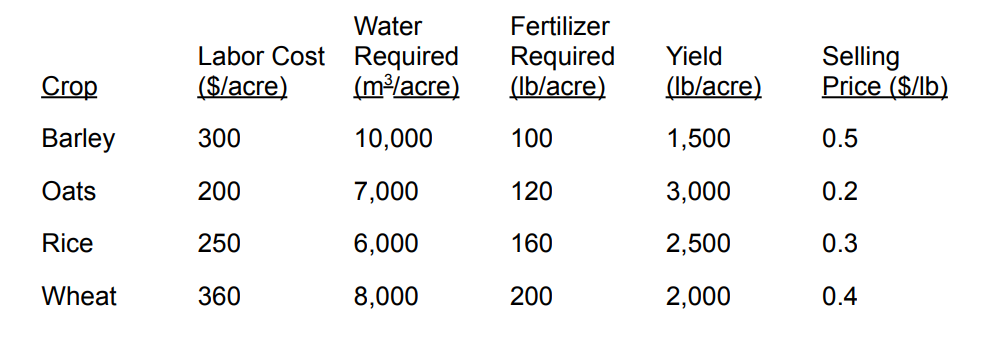

The farmer can give part or all of the land for lease (not plant any crop), in which case he gets \$200 per acre. The cost of water is \$0.02/m3 and the cost of fertilizer is \$2/lb. 

The farmer has no money to start with and can get a maximum loan of $50,000 from the land mortgage bank at an interest rate of 8% per year. He must repay the loan after one year. 

The irrigation canal cannot supply more than 4x10^5 m3 of water.

In [4]:
#import statements
import numpy as np
from scipy.optimize import linprog

Google Sheets used for Calculations: https://docs.google.com/spreadsheets/d/1LBMkBHupwPK9Rw9d1w8pzNpK4Snj_fu-9z7HYomodc8/edit?usp=sharing

In [52]:
"""
This method uses the linprog method from the SciPy library which is essentially
just finding (x) in A_ub (x) = b_ub. The rows of A_ub are the water m3/acre
of each crop, the per crop cost acc to the sheets above and finally how many
min acres of each option (planting or selling land) is to be considered- 1.0
acres in each case. The goal is to maximize the profit as per the input per acre
profit in c.

"""

#objective function for maximizing profit
def obj_funct(per_crop_profit, water, per_crop_cost):
    c = np.array(per_crop_profit)

    A_ub = np.array([water,
                per_crop_cost,
                [1.0, 1.0, 1.0, 1.0, 1.0]])

    b_ub = np.array([400000.0, 50000.0, 200.0])

    result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=None)

    return result

# Alternative Cases:

In [53]:
#Case 1: 8% Interest, everything else normal
per_crop_profit = [-50.0, -20.0, -60.0, 120.0, -200.0]
water = [10000.0, 7000.0, 6000.0, 8000.0, 0.0]
per_crop_cost = [700.0, 580.0, 690.0, 920.0, 0.0]

result = obj_funct(per_crop_profit, water, per_crop_cost) #uses negative values to output max profit using a minimizing function

#calculating per crop acreage
x = np.array(result.x)
obj = result.fun

# for each crop: (crop cost * acres of crop being grown), put together = total loaned; interest = owed * i_rate
i_rate = 8.0
interest = (700.0*x[0] + 580.0*x[1] + 690.0*x[2] + 920*x[3]) * i_rate/100

print("Max Profit: $", abs(obj)-interest)

print("Strategy: " + str(x))

Max Profit: $ 40000.0
Strategy: [  0.   0.   0.   0. 200.]


In [54]:
#Case 2: 0% Interest, everything else normal
per_crop_profit = [-50.0, -20.0, -60.0, 120.0, -200.0]
water = [10000.0, 7000.0, 6000.0, 8000.0, 0.0]
per_crop_cost = [700.0, 580.0, 690.0, 920.0, 0.0]

result = obj_funct(per_crop_profit, water, per_crop_cost)

x = np.array(result.x)
obj = result.fun

i_rate = 0.0
interest = (700.0*x[0] + 580.0*x[1] + 690.0*x[2] + 920.0*x[3]) * i_rate/100

print("Max Profit: $", abs(obj)-interest)

print("Strategy: " + str(x))

Max Profit: $ 40000.0
Strategy: [  0.   0.   0.   0. 200.]


In [61]:
#Case 3: 8% Interest, $0.5/lb Oats Price (Increased from $0.2/lb)
per_crop_profit = [-50.0, -920.0, -60.0, 120.0, -200.0]
water = [10000.0, 7000.0, 6000.0, 8000.0, 0.0]
per_crop_cost = [700.0, 580.0, 690.0, 920.0, 0.0]

result = obj_funct(per_crop_profit, water, per_crop_cost)

x = np.array(result.x)
obj = result.fun

i_rate = 8.0
interest = (700.0*x[0] + 580.0*x[1] + 690.0*x[2] + 920*x[3]) * i_rate/100

print("Max Profit: $", abs(obj)-interest)

print("Strategy: " + str(x))

Max Profit: $ 78491.42857142858
Strategy: [  0.          57.14285714   0.           0.         142.85714286]


In [62]:
#Case 4: 8% Interest, 1/10 Labour Cost, 1/10 Water Used, $0.5/lb Oats Price
per_crop_profit = [-500.0, -1226.0, -393.0, -348.0, -200.0]
water = [1000.0, 700.0, 600.0, 800.0, 0.0]
per_crop_cost = [250.0, 274.0, 357.0, 452.0, 0.0]

result = obj_funct(per_crop_profit, water, per_crop_cost)

x = np.array(result.x)
obj = result.fun

i_rate = 8.0
interest = (250.0*x[0] + 274.0*x[1] +  357.0*x[2] + 452.0*x[3]) * i_rate/100

print("Max Profit: $", abs(obj)-interest)

print("Strategy: " + str(x))

Max Profit: $ 223226.27737226276
Strategy: [  0.         182.48175182   0.           0.          17.51824818]
